In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

In [2]:
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# $\rm{[C_{II}]}$ Cut-Off Maps

In [3]:
# Initialize LineModel with default model
m = lim()
m_cii = lim('Lichen_v4', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [4]:
m_cii.update(model_par = {'zdex': 0.3,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.017,
 'BehrooziFile': 'sfr_reinterp.dat'}, 
             tobs = 100000*u.hr,
             nuObs = 400*u.GHz,
             Delta_nu = 28*u.GHz,
             Omega_field = 16*(u.deg**2)
            )

Gaussian:

In [5]:
m_cii.update(catalogue_file = '/mnt/scratch-lustre/horlaville/nate_sims/june_9/gaussian/gauss_lc_0.npz')

In [6]:
gauss_sig = m_cii.maps

Loading .npz catalogues...


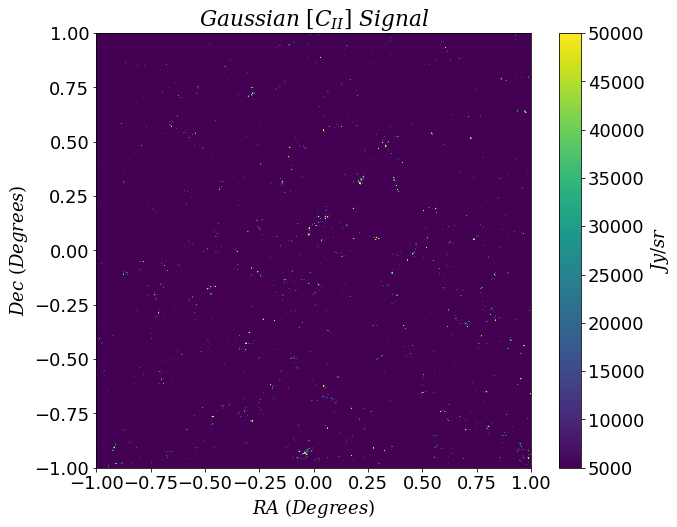

In [50]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 8))

plt.subplot(111)
plt.imshow(gauss_sig[:, :, 3], vmin = 5000, vmax = 50000, cmap = 'viridis', extent = [-1, 1, -1, 1])
plt.title(r'$Gaussian\ [C_{II}]\ Signal$')
plt.xlabel(r'$RA\ (Degrees)$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$Jy/sr$')

Non-Gaussian:

In [7]:
m_cii.update(catalogue_file = '/mnt/scratch-lustre/horlaville/nate_sims/june_9/ngaussian/ngauss_mlambda25_0.npz')

In [8]:
ngauss_sig = m_cii.maps

Loading .npz catalogues...


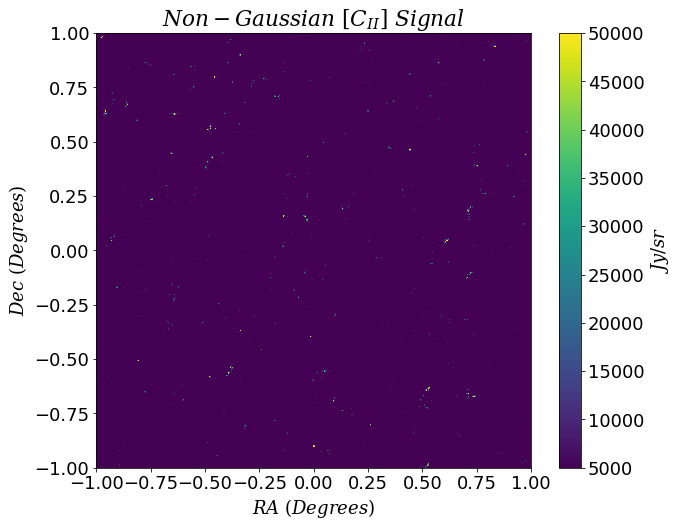

In [6]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 8))

plt.subplot(111)
plt.imshow(ngauss_sig[:, :, 3], vmin = 5000, vmax = 50000, cmap = 'viridis', extent = [-1, 1, -1, 1])
plt.title(r'$Non-Gaussian\ [C_{II}]\ Signal$')
plt.xlabel(r'$RA\ (Degrees)$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$Jy/sr$')

Together:

In [9]:
ng_g_sig = ngauss_sig - gauss_sig

In [15]:
minf = 5000
maxf = 50000

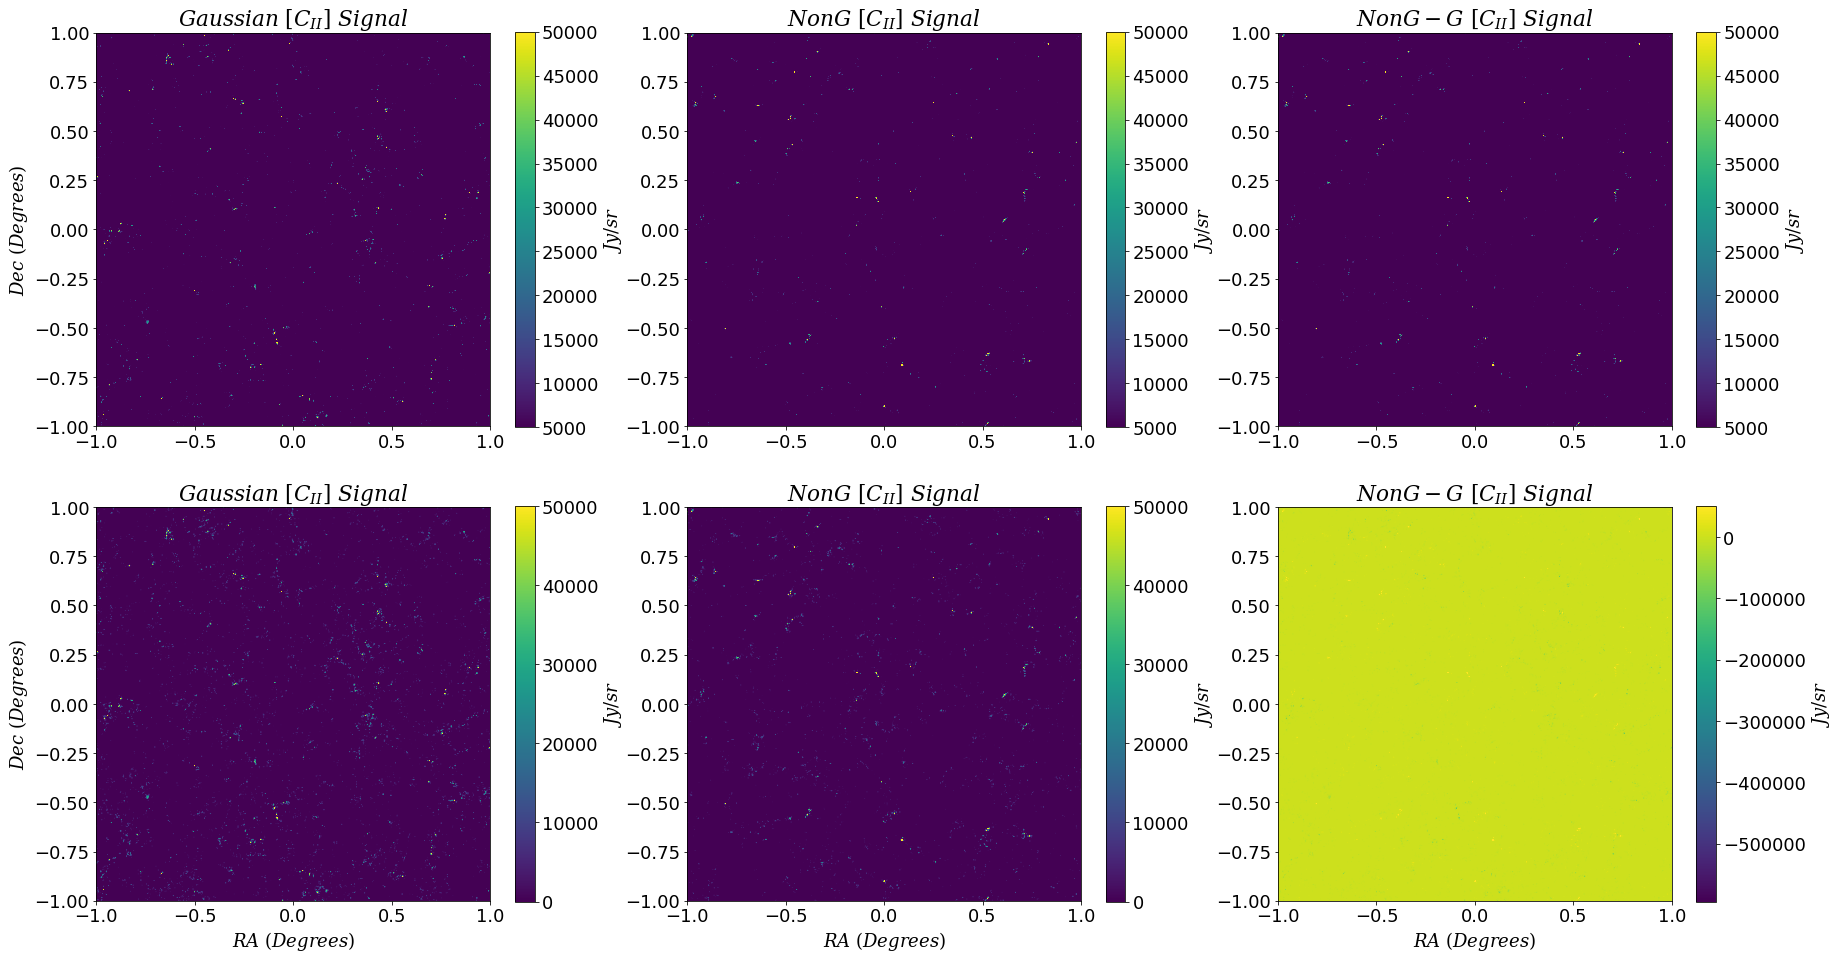

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 16))

plt.subplot(231)
plt.imshow(gauss_sig[:, :, 3], vmin = minf, vmax = maxf, cmap = 'viridis', extent = [-1, 1, -1, 1])
plt.title(r'$Gaussian\ [C_{II}]\ Signal$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$Jy/sr$')

plt.subplot(232)
plt.imshow(ngauss_sig[:, :, 3], vmin = minf, vmax = maxf, cmap = 'viridis', extent = [-1, 1, -1, 1])
plt.title(r'$NonG\ [C_{II}]\ Signal$')
plt.colorbar(label = r'$Jy/sr$')

plt.subplot(233)
plt.imshow(ng_g_sig[:, :, 3], vmin = minf, vmax = maxf, cmap = 'viridis', extent = [-1, 1, -1, 1])
plt.title(r'$NonG-G\ [C_{II}]\ Signal$')
plt.colorbar(label = r'$Jy/sr$')



plt.subplot(234)
plt.imshow(gauss_sig[:, :, 3], vmax = maxf, cmap = 'viridis', extent = [-1, 1, -1, 1])
plt.title(r'$Gaussian\ [C_{II}]\ Signal$')
plt.xlabel(r'$RA\ (Degrees)$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$Jy/sr$')

plt.subplot(235)
plt.imshow(ngauss_sig[:, :, 3], vmax = maxf, cmap = 'viridis', extent = [-1, 1, -1, 1])
plt.title(r'$NonG\ [C_{II}]\ Signal$')
plt.xlabel(r'$RA\ (Degrees)$')
plt.colorbar(label = r'$Jy/sr$')

plt.subplot(236)
plt.imshow(ng_g_sig[:, :, 3], vmax = maxf, cmap = 'viridis', extent = [-1, 1, -1, 1])
plt.title(r'$NonG-G\ [C_{II}]\ Signal$')
plt.xlabel(r'$RA\ (Degrees)$')
plt.colorbar(label = r'$Jy/sr$')

Histogram Tails

In [9]:
map_shape = m_cii.maps.shape
noise_sigma = m_cii.sigma_N
noise_map = np.random.normal(0, noise_sigma.to(u.Jy/u.sr, equivalencies=u.brightness_temperature(m_cii.nuObs)).value, map_shape)

In [10]:
g_fc = gauss_sig.value + noise_map
ng_fc = ngauss_sig.value + noise_map

Text(0.5, 1.0, 'Histogram of Intensities, $t_{obs}$ = 100000h')

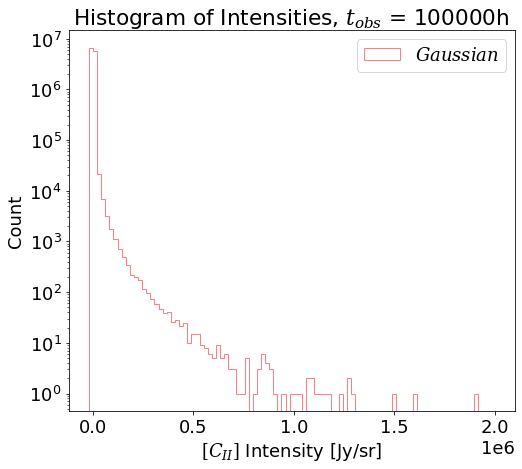

In [13]:
n_g, bins, _ = plt.hist(g_fc.flatten(), bins = np.linspace(-20000, 2000000, 100), edgecolor = 'r', label = r'$Gaussian$', alpha = 0.5, histtype = 'step')
#n_mhi, _, _ = plt.hist(mhi_forecast.flatten(), bins = bins, edgecolor = 'black', label = r'$M_{HI}$', alpha = 0.5, histtype = 'step')
plt.legend()

center = (bins[:-1] + bins[1:]) / 2


plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.yscale('log')
plt.title(r'Histogram of Intensities, $t_{obs}$ = 100000h')

Text(0.5, 1.0, 'Histogram of Intensities, $t_{obs}$ = 100000h')

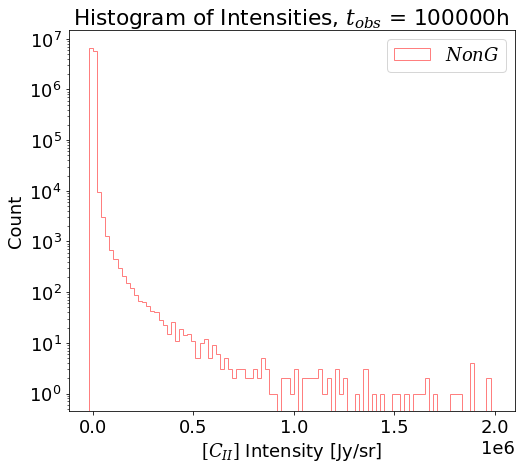

In [14]:
n_ng, bins, _ = plt.hist(ng_fc.flatten(), bins = np.linspace(-20000, 2000000, 100), edgecolor = 'r', label = r'$NonG$', alpha = 0.5, histtype = 'step')
#n_mhi, _, _ = plt.hist(mhi_forecast.flatten(), bins = bins, edgecolor = 'black', label = r'$M_{HI}$', alpha = 0.5, histtype = 'step')
plt.legend()

center = (bins[:-1] + bins[1:]) / 2


plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.yscale('log')
plt.title(r'Histogram of Intensities, $t_{obs}$ = 100000h')

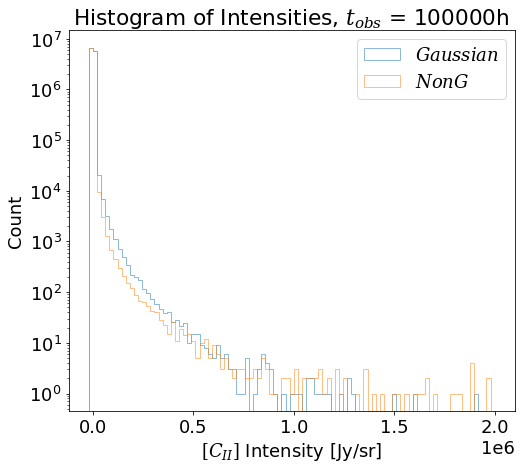

In [18]:
plt.hist(g_fc.flatten(), bins = np.linspace(-20000, 2000000, 100), label = r'$Gaussian$', alpha = 0.5, histtype = 'step')
plt.hist(ng_fc.flatten(), bins = np.linspace(-20000, 2000000, 100), label = r'$NonG$', alpha = 0.5, histtype = 'step')

plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.yscale('log')
plt.title(r'Histogram of Intensities, $t_{obs}$ = 100000h')
plt.legend()

In [46]:
gfilter_range = np.linspace(0, 4, 5)

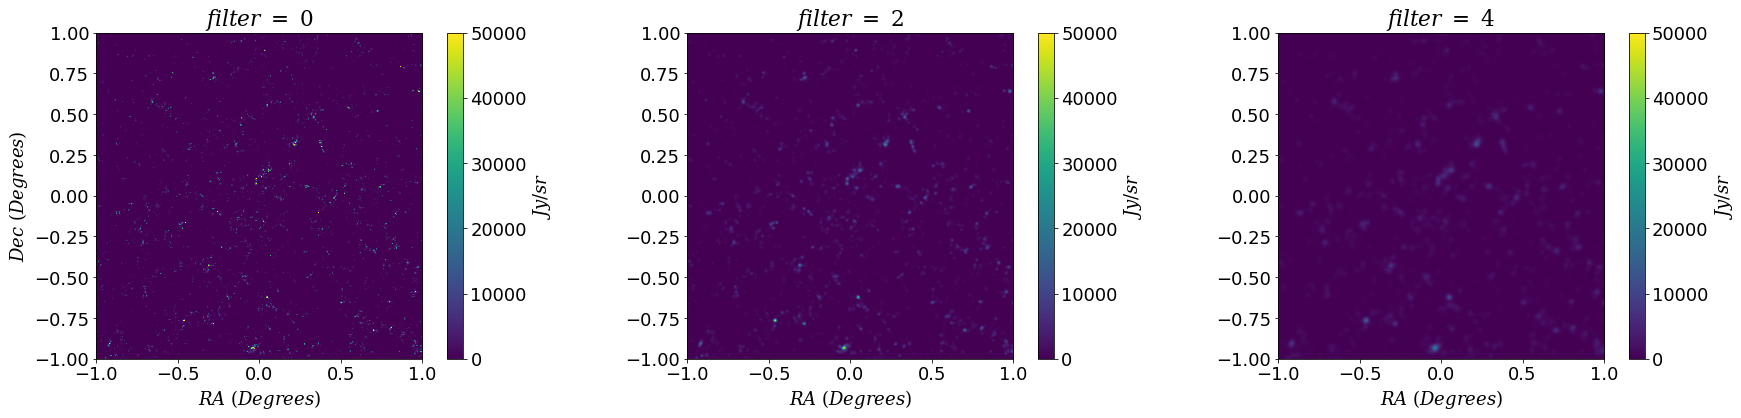

In [48]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 6))

plt.subplot(131)
plt.imshow(gaussian_filter(gauss_sig[:, :, 3], 0), vmax = 50000, cmap = 'viridis', extent = [-1, 1, -1, 1])
plt.title(r'$filter\ =\ 0$')
plt.xlabel(r'$RA\ (Degrees)$')
plt.ylabel(r'$Dec\ (Degrees)$')
plt.colorbar(label = r'$Jy/sr$')

plt.subplot(132)
plt.imshow(gaussian_filter(gauss_sig[:, :, 3], 2), vmax = 50000, cmap = 'viridis', extent = [-1, 1, -1, 1])
plt.title(r'$filter\ =\ 2$')
plt.xlabel(r'$RA\ (Degrees)$')
plt.colorbar(label = r'$Jy/sr$')

plt.subplot(133)
plt.imshow(gaussian_filter(gauss_sig[:, :, 3], 4), vmax = 50000, cmap = 'viridis', extent = [-1, 1, -1, 1])
plt.title(r'$filter\ =\ 4$')
plt.xlabel(r'$RA\ (Degrees)$')
plt.colorbar(label = r'$Jy/sr$')

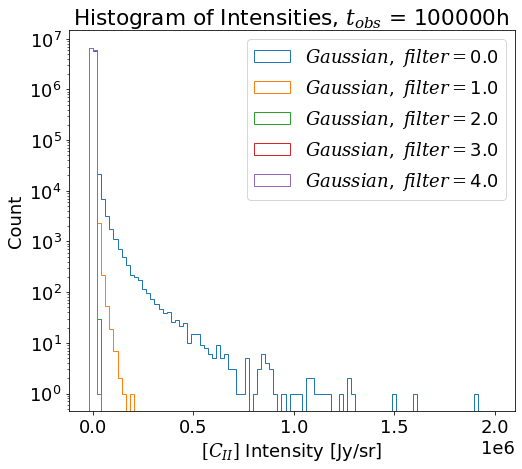

In [49]:
for i, j in enumerate(gfilter_range):
    
    plt.hist((gaussian_filter(gauss_sig, j) + noise_map).flatten(), bins = np.linspace(-20000, 2000000, 100), label = r'$Gaussian,\ filter=$'+str(j), histtype = 'step')
    plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
    plt.ylabel('Count')
    plt.yscale('log')
    plt.title(r'Histogram of Intensities, $t_{obs}$ = 100000h')
    plt.legend()

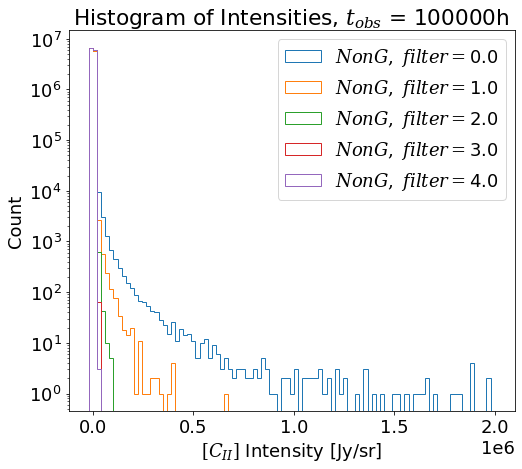

In [50]:
for i, j in enumerate(gfilter_range):
    
    plt.hist((gaussian_filter(ngauss_sig, j) + noise_map).flatten(), bins = np.linspace(-20000, 2000000, 100), label = r'$NonG,\ filter=$'+str(j), histtype = 'step')
    plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
    plt.ylabel('Count')
    plt.yscale('log')
    plt.title(r'Histogram of Intensities, $t_{obs}$ = 100000h')
    plt.legend()